In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingWorld.csv")
Pre_data

,Unnamed: 0,Host Since,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,...,Number of Reviews,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day
0,0,2015-07-21,55.675979,12.532960,1.0,1.0,1.0,1.0,298.0,0.0,...,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,4,2015-10-07,55.683966,12.553029,2.0,1.0,1.0,1.0,232.0,0.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,5,2014-07-27,55.675400,12.546975,4.0,1.0,2.0,2.0,603.0,0.0,...,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
3,6,2017-03-24,55.680357,12.547335,2.0,1.0,1.0,1.0,715.0,283.0,...,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,7,2017-02-07,55.684971,12.547870,6.0,1.0,2.0,6.0,649.0,0.0,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368331,494949,2014-05-18,52.563218,13.341143,3.0,1.0,1.0,2.0,49.0,60.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
368332,494950,2016-11-28,52.550743,13.341502,2.0,1.0,1.0,1.0,36.0,5.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
368333,494951,2016-09-03,52.543364,13.349606,2.0,1.0,1.0,1.0,22.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
368334,494952,2015-04-14,52.550551,13.339338,1.0,1.0,1.0,1.0,20.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,group
0,0,2015-07-21,55.675979,12.532960,1.0,1.0,1.0,1.0,298.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,group_5
1,4,2015-10-07,55.683966,12.553029,2.0,1.0,1.0,1.0,232.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,group_5
2,5,2014-07-27,55.675400,12.546975,4.0,1.0,2.0,2.0,603.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,group_5
3,6,2017-03-24,55.680357,12.547335,2.0,1.0,1.0,1.0,715.0,283.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,group_5
4,7,2017-02-07,55.684971,12.547870,6.0,1.0,2.0,6.0,649.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,group_5


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [5]:
train['group'].value_counts() / len(train)

group_2    0.372042
group_1    0.227707
group_3    0.173134
group_5    0.144627
group_4    0.082489
Name: group, dtype: float64

In [6]:
test['group'].value_counts() / len(test)

group_2    0.372034
group_1    0.227711
group_3    0.173142
group_5    0.144622
group_4    0.082492
Name: group, dtype: float64

In [7]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,...,Number of Reviews,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day
24031,32725,2012-08-14,45.536028,-73.567324,2.0,1.0,1.0,1.0,24.0,0.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
73758,99789,2014-07-01,48.864752,2.339920,2.0,1.0,0.0,1.0,62.0,35.0,...,75.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
136997,184727,2015-07-18,51.481421,-0.091987,2.0,1.0,1.0,1.0,30.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
97823,132241,2013-04-03,34.049989,-118.282367,1.0,1.0,0.0,1.0,75.0,25.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
283178,381451,2014-04-11,45.425828,12.337569,2.0,1.0,1.0,1.0,65.0,20.0,...,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4


In [8]:
test.drop(['Unnamed: 0','group', 'Host Since'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,...,Number of Reviews,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day
346790,40.721243,-73.982009,2.0,1.0,1.0,1.0,90.0,25.0,1.0,0.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
137448,-37.819780,145.092658,2.0,1.0,1.0,2.0,85.0,0.0,2.0,40.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
280260,39.570297,2.636574,4.0,1.0,1.0,2.0,60.0,30.0,1.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
256062,33.765075,-118.149789,2.0,1.0,0.0,1.0,110.0,20.0,1.0,0.0,...,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
12312,30.246376,-97.749543,2.0,0.0,1.0,1.0,55.0,0.0,1.0,20.0,...,148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [9]:
train_y = train[['Price']]
train_y.head()

,Price
24031,24.0
73758,62.0
136997,30.0
97823,75.0
283178,65.0


In [10]:
train.drop(['Unnamed: 0', 'Price', 'Host Since'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,...,Number of Reviews,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day
24031,45.536028,-73.567324,2.0,1.0,1.0,1.0,0.0,1.0,7.0,4.0,...,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
73758,48.864752,2.339920,2.0,1.0,0.0,1.0,35.0,1.0,0.0,1.0,...,75.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
136997,51.481421,-0.091987,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5
97823,34.049989,-118.282367,1.0,1.0,0.0,1.0,25.0,1.0,0.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
283178,45.425828,12.337569,2.0,1.0,1.0,1.0,20.0,1.0,20.0,1.0,...,68.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4


In [11]:
test_y= test[['Price']]
test_y.head()

,Price
346790,90.0
137448,85.0
280260,60.0
256062,110.0
12312,55.0


In [12]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,...,Number of Reviews,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day
346790,40.721243,-73.982009,2.0,1.0,1.0,1.0,25.0,1.0,0.0,4.0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
137448,-37.819780,145.092658,2.0,1.0,1.0,2.0,0.0,2.0,40.0,1.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
280260,39.570297,2.636574,4.0,1.0,1.0,2.0,30.0,1.0,0.0,2.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
256062,33.765075,-118.149789,2.0,1.0,0.0,1.0,20.0,1.0,0.0,2.0,...,12.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
12312,30.246376,-97.749543,2.0,0.0,1.0,1.0,0.0,1.0,20.0,1.0,...,148.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [12]:
from sklearn.linear_model import LinearRegression

l_reg = LinearRegression()
l_reg.fit(train_X, train_y)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = l_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

11655.586041333901 107.9610394602326 63.15551491700768


In [14]:
predictions = l_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

11627.186208063476 107.82943108476218 62.713075333716596


In [15]:
from sklearn.tree import DecisionTreeRegressor

d_reg = DecisionTreeRegressor()
d_reg.fit(train_X, train_y)

DecisionTreeRegressor()

In [16]:
predictions = d_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

0.0 0.0 0.0


In [17]:
predictions = d_reg.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

7381.779673671065 85.91728390534156 46.30429765977087


In [18]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(train_X, train_y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [19]:
predictions = svr.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

22969.735438418775 151.5576967310429 79.08744645427578


In [20]:
predictions = svr.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

In [13]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [ ]:
predictions = knn.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

In [ ]:
predictions = knn.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

In [ ]:
from sklearn.neural_network import MLPRegressor

ann = MLPRegressor()
ann.fit(train_X, train_y)

In [ ]:
predictions = ann.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

In [ ]:
predictions = ann.predict(test_X)
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

In [15]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_15404/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

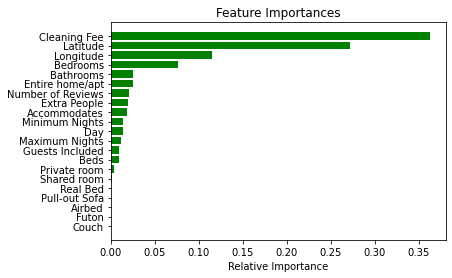

In [16]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [ ]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)